<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Triangulation:
We generate random points in the 3D space and project them into two test views. Then, we add noise to those observations and reconstruct points back in 3D using the OpenCV function cv2.triangulatePoints. As input, the function takes observations from two cameras and camera projection matrices (projective mapping from the world coordinate frame to a view coordinate frame) for each view. It returns the reconstructed points in the world coordinate frame.<br>

In computer vision a camera matrix or (camera) projection matrix is a 3×4 which describes the mapping of a pinhole camera from 3D points in the world to 2D points in an image.



Original points:
[[ 0.572  0.764 -1.298]
 [ 0.808  0.387  0.831]
 [ 1.458 -1.479  0.100]
 [ 1.759  1.295  0.749]
 [ 0.459  0.873 -0.770]]
Reconstructed points:
[[ 0.604  0.630 -1.245]
 [ 0.760  0.388  0.779]
 [ 1.422 -1.447  0.098]
 [ 1.732  1.248  0.734]
 [ 0.545  0.881 -0.850]]


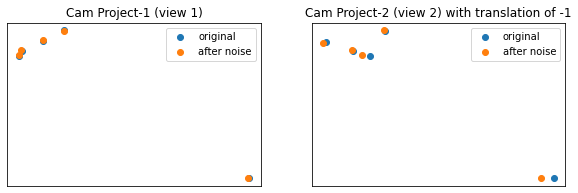

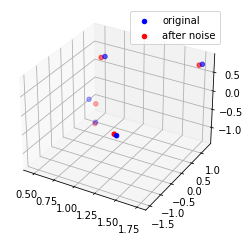

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Generate the test camera's projection matrices or camera matrix:
P1 = np.eye(3, 4, dtype=np.float32)
P2 = np.eye(3, 4, dtype=np.float32)
P2[0, 3] = -1

#Generate 5 test points in the 3D space ():
N = 5
points3d = np.empty((4, N), np.float32)
points3d[:3, :] = np.random.randn(3, N)
points3d[3, :] = 1

#Project the 3D points into two views and add noise:
#view1:  image_points = camera_matrix @ 3D_point 
points1 = P1 @ points3d
points1 = points1[:2, :] / points1[2, :]
points1_orig = np.copy(points1)
points1[:2, :] += np.random.randn(2, N) * 9*1e-2

#view2 with the translation of -1:
points2 = P2 @ points3d
points2 = points2[:2, :] / points2[2, :]
points2_orig = np.copy(points2)
points2[:2, :] += np.random.randn(2, N) * 9*1e-2

#Reconstruct the points from noisy observations:
points3d_reconstr = cv2.triangulatePoints(P1, P2, points1, points2)
points3d_reconstr /= points3d_reconstr[3, :]

#outcome
num_img = 2
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,3), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].scatter(points1_orig[0], points1_orig[1], label='original')
ax[0].scatter(points1[0], points1[1], label='after noise')
ax[0].legend()
ax[0].set_title('Cam Project-1 (view 1)')

ax[1].scatter(points2_orig[0], points2_orig[1], label='original')
ax[1].scatter(points2[0], points2[1], label='after noise')
ax[1].legend()
ax[1].set_title('Cam Project-2 (view 2) with translation of -1')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points3d[:3].T[:,0], points3d[:3].T[:,1], points3d[:3].T[:,2], color='b', label='original')
ax.scatter(points3d_reconstr[:3].T[:,0], points3d_reconstr[:3].T[:,1], points3d_reconstr[:3].T[:,2], color='r', label='after noise')
ax.legend()

print('Original points:')
print(points3d[:3].T)
print('Reconstructed points:')
print(points3d_reconstr[:3].T)

Example 2:

Original 5 Image Points:
 [[-4.32306310e+03 -3.21388000e+01]
 [-5.17194347e+13 -4.69610735e+10]
 [ 1.10546720e+03  7.08722400e+02]
 [ 9.94903700e+02  1.01492430e+03]
 [ 1.04701110e+03  8.65866600e+02]]
5 Image Points after y_translation = -1000:
 [[-1.36985292e+10  1.42581279e+11]
 [-4.12262416e+15  7.48291461e+15]
 [-1.94285456e+09  1.59607547e+11]
 [-1.95460611e+07  1.79812058e+09]
 [-5.06330055e+08  4.90550131e+10]]


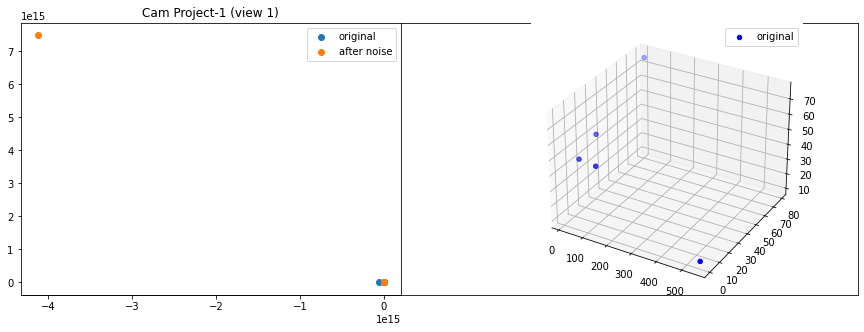

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

xyz= np.array([[95,10,44],
               [550,0.5,10.5],
               [12,13,43],
               [10,79,76],
               [10,30,50]])

rvec_1 = np.zeros(3)
tvec_1 = np.zeros(3)
intrinsics = np.array([[664.632, 0.000, 931.531],
                       [0.000, 663.832, 520.640],
                       [0.000, 0.000, 1.000]])

distortion = np.array([-0.409, 0.216, 0.000, 0.001, -0.072])
image1_points, _ = cv2.projectPoints(xyz, rvec_1, tvec_1, intrinsics, distortion)
print('Original 5 Image Points:\n', image1_points.squeeze().round(4))

# apply translation for second image
y_translation = -1000
rvec_2 = np.zeros(3)
tvec_2 = np.zeros(3)
tvec_2[1]=y_translation
image2_points, _ = cv2.projectPoints(xyz, rvec_2, tvec_2, intrinsics, distortion)
print('5 Image Points after y_translation = -1000:\n',image2_points.squeeze().round(4))

#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(image1_points.squeeze().T[0], image1_points.squeeze().T[1], label='original')
ax.scatter(image2_points.squeeze().T[0], image2_points.squeeze().T[1], label='after noise')
ax.legend()
ax.set_title('Cam Project-1 (view 1)')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xyz.T[0], xyz.T[1], xyz.T[2], color='b', label='original')
ax.legend()

Example-3:<br>
cv2.triangulatePoints is a function of OpenCV that can calculate the coordinates of three-dimensional points. It takes as input two projection matrices and the corresponding coordinates of a point on the image, and outputs the coordinates of the point in 3D space.

Here is a sample code using cv2.triangulatePoints:

[[-0.481  0.033  0.000]
 [-0.481  0.030  0.000]
 [-0.480  0.029  0.000]]


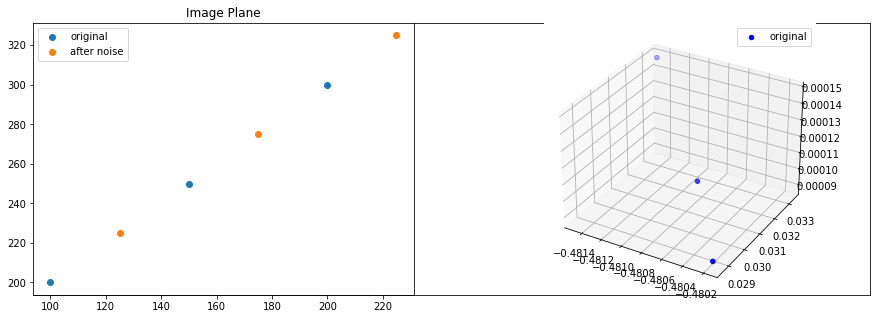

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create two projection matrices for the left and right cameras
P1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]])
P2 = np.array([[1, 0, 0, 0.5], [0, 1, 0, 0], [0, 0, 1, 0]])

# Create an array of 2D points in the left and right images
points1 = np.array([[100, 200], [150, 250], [200, 300]])
points2 = np.array([[125, 225], [175, 275], [225, 325]])

# Convert the points to homogeneous coordinates
points1 = np.concatenate((points1, np.ones((points1.shape[0], 1))), axis=1)
points2 = np.concatenate((points2, np.ones((points2.shape[0], 1))), axis=1)

# Triangulate the points to find their 3D coordinates
# points3D = cv2.triangulatePoints(P1, P2, points1.T, points2.T)
points3D = cv2.triangulatePoints(P1[:3], P2[:3], points1.T[:2], points2.T[:2])

# Convert the points back to non-homogeneous coordinates
points3D = points3D / points3D[3]

# Print the 3D coordinates
print(points3D[:3].T)

#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(points1[:,:2].T[0], points1[:,:2].T[1], label='original')
ax.scatter(points2[:,:2].T[0], points2[:,:2].T[1], label='after noise')
ax.legend()
ax.set_title('Image Plane')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(points3D[:3][0], points3D[:3][1], points3D[:3][2], color='b', label='original')
ax.legend()

Example-4:

In [4]:
import numpy as np
# Camera projection matrices
P1 = np.eye(4)
P2 = np.array([[ 0.878, -0.01 ,  0.479, -1.995],
            [ 0.01 ,  1.   ,  0.002, -0.226],
            [-0.479,  0.002,  0.878,  0.615],
            [ 0.   ,  0.   ,  0.   ,  1.   ]])
# Homogeneous arrays
a3xN = np.array([[ 0.091,  0.167,  0.231,  0.083,  0.154],
              [ 0.364,  0.333,  0.308,  0.333,  0.308],
              [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])
b3xN = np.array([[ 0.42 ,  0.537,  0.645,  0.431,  0.538],
              [ 0.389,  0.375,  0.362,  0.357,  0.345],
              [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ]])
# The cv2 method
X = cv2.triangulatePoints( P1[:3], P2[:3], a3xN[:2], b3xN[:2] )
# Remember to divide out the 4th row. Make it homogeneous
X /= X[3]
# Recover the origin arrays from PX
x1 = np.dot(P1[:3],X)
x2 = np.dot(P2[:3],X)
# Again, put in homogeneous form before using them
x1 /= x1[2]
x2 /= x2[2]
 
print ('X\n', X)
print ('x1\n', x1)
print ('x2\n', x2)

X
 [[ 1.00277401  2.00861221  3.01259262  1.00350119  2.01054271]
 [ 4.01217993  4.01031008  4.01743742  4.02958919  4.01894571]
 [11.01977924 12.02856882 13.04163081 12.09159201 13.05497299]
 [ 1.          1.          1.          1.          1.        ]]
x1
 [[0.09099765 0.1669868  0.23099815 0.08299165 0.15400589]
 [0.36408896 0.33339877 0.30804717 0.33325547 0.30784788]
 [1.         1.         1.         1.         1.        ]]
x2
 [[0.42002058 0.53709198 0.64501084 0.43105651 0.5379664 ]
 [0.38890031 0.37453153 0.36194222 0.35671333 0.34517832]
 [1.         1.         1.         1.         1.        ]]


Example-5

Triangulate 3d points - units in meters
Projected point from openCV: [[-0.035 -0.006  2.022  1.000]]
Projected point from 2 camera views: [-0.034 -0.006  2.023  1.000]
Projected point from 3 camera views: [-0.004  0.062  2.011  1.000]
Projected points from openCV:
 [[-0.035 -0.006  2.022  1.000]
 [-0.015 -0.006  2.018  1.000]]
Projected point from SFM:
 [[-0.034 -0.006  2.023  1.000]
 [-0.015 -0.006  2.019  1.000]]


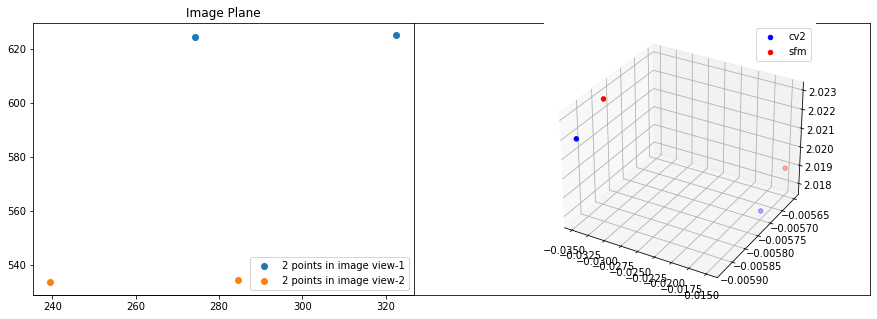

In [43]:
from __future__ import print_function
import numpy as np
import cv2
import time

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})


def triangulate_nviews(P, ip):
    """
    Triangulate a point visible in n camera views.
    P is a list of camera projection matrices.
    ip is a list of homogenised image points. eg [ [x, y, 1], [x, y, 1] ], OR,
    ip is a 2d array - shape nx3 - [ [x, y, 1], [x, y, 1] ]
    len of ip must be the same as len of P
    """
    if not len(ip) == len(P):
        raise ValueError('Number of points and number of cameras not equal.')
    n = len(P)
    M = np.zeros([3*n, 4+n])
    for i, (x, p) in enumerate(zip(ip, P)):
        M[3*i:3*i+3, :4] = p
        M[3*i:3*i+3, 4+i] = -x
    V = np.linalg.svd(M)[-1]
    X = V[-1, :4]
    return X / X[3]


def triangulate_points(P1, P2, x1, x2):
    """
    Two-view triangulation of points in
    x1,x2 (nx3 homog. coordinates).
    Similar to openCV triangulatePoints.
    """
    if not len(x2) == len(x1):
        raise ValueError("Number of points don't match.")
    X = [triangulate_nviews([P1, P2], [x[0], x[1]]) for x in zip(x1, x2)]
    return np.array(X)


# -----------------------------------------------------------------------------
# Data
# -----------------------------------------------------------------------------

# 3 camera projection matrices
P1 = np.array([[5.010e+03, 0.000e+00, 3.600e+02, 0.000e+00],
               [0.000e+00, 5.010e+03, 6.400e+02, 0.000e+00],
               [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]])

P2 = np.array([[5.037e+03, -9.611e+01, -1.756e+03, 4.284e+03],
               [2.148e+02,  5.354e+03,  1.918e+02, 8.945e+02],
               [3.925e-01,  7.092e-02,  9.169e-01, 4.930e-01]])

P3 = np.array([[5.217e+03,  2.246e+02,  2.366e+03, -3.799e+03],
               [-5.734e+02,  5.669e+03,  8.233e+02, -2.567e+02],
               [-3.522e-01, -5.839e-02,  9.340e-01,  6.459e-01]])

# 3 corresponding image points - nx2 arrays, n=1
x1 = np.array([[274.128, 624.409]])
x2 = np.array([[239.571, 533.568]])
x3 = np.array([[297.574, 549.260]])

# 3 corresponding homogeneous image points - nx3 arrays, n=1
x1h = np.array([[274.128, 624.409, 1.0]])
x2h = np.array([[239.571, 533.568, 1.0]])
x3h = np.array([[297.574, 549.260, 1.0]])

# 3 corresponding homogeneous image points - nx3 arrays, n=2
x1h2 = np.array([[274.129, 624.409, 1.0], [322.527, 624.869, 1.0]])
x2h2 = np.array([[239.572, 533.568, 1.0], [284.507, 534.572, 1.0]])
x3h2 = np.array([[297.575, 549.260, 1.0], [338.942, 546.567, 1.0]])


# -----------------------------------------------------------------------------
# Test
# -----------------------------------------------------------------------------

print('Triangulate 3d points - units in meters')
# triangulatePoints requires 2xn arrays, so transpose the points
p = cv2.triangulatePoints(P1, P2, x1.T, x2.T)
# however, homgeneous point is returned
p /= p[3]
print('Projected point from openCV:',  p.T)

p = triangulate_nviews([P1, P2], [x1h, x2h])
print('Projected point from 2 camera views:',  p)

p = triangulate_nviews([P1, P2, P3], [x1h, x2h, x3h])
print('Projected point from 3 camera views:',  p)

# cv2 two image points - not homgeneous on input
p_cv = cv2.triangulatePoints(P1, P2, x1h2[:, :2].T, x2h2[:, :2].T)
p_cv /= p_cv[3]
print('Projected points from openCV:\n', p_cv.T)

p_sfm = triangulate_points(P1, P2, x1h2, x2h2)
print('Projected point from SFM:\n',  p_sfm)


#outcome
num_img = 1
fig, ax = plt.subplots(1, num_img, figsize=(15*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x1h2[:,:2].T[0], x1h2[:,:2].T[1], label='2 points in image view-1')
ax.scatter(x2h2[:,:2].T[0], x2h2[:,:2].T[1], label='2 points in image view-2')
ax.legend()
ax.set_title('Image Plane')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(p_cv[:3][0], p_cv[:3][1], p_cv[:3][2], color='b', label='cv2')
ax.scatter(p_sfm.T[:3][0], p_sfm.T[:3][1], p_sfm.T[:3][2], color='r', label='sfm')
ax.legend()